In [ ]:
##https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Colab Notebooks/Internship/Kaggle"
## /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
##changing the working directory
%cd /content/gdrive/MyDrive/Colab Notebooks/Internship/Kaggle
##Check the present working directory using pwd command

/content/gdrive/MyDrive/Colab Notebooks/Internship/Kaggle


In [4]:
#!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

In [5]:
!ls

chest_xray  kaggle.json  pnemonia_data.pickle


In [6]:
##unzipping the zip files and deleting the zip files
#!unzip \*.zip  && rm *.zip

___________________


____________________

In [7]:
# required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
img = image.load_img("/content/gdrive/MyDrive/Colab Notebooks/Internship/Kaggle/chest_xray/train/NORMAL/IM-0115-0001.jpeg")
#IM-0115-0001

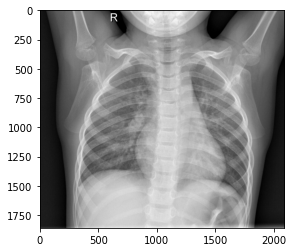

In [9]:
plt.imshow(img)

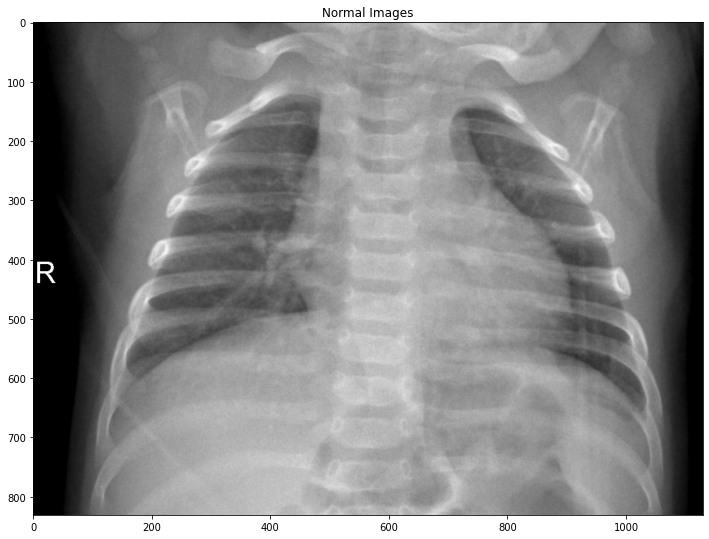

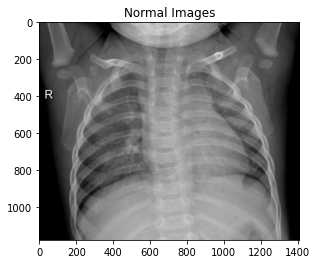

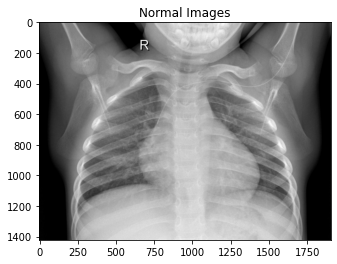

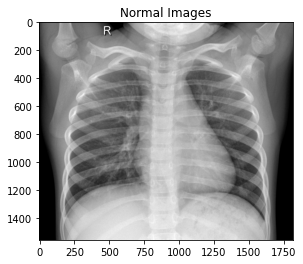

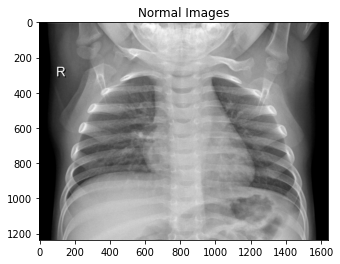

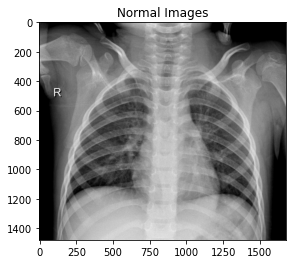

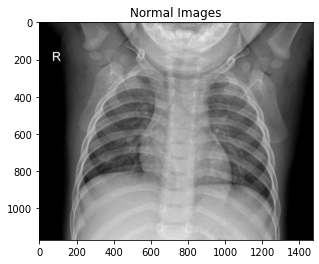

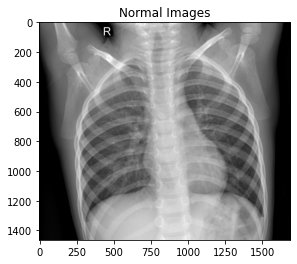

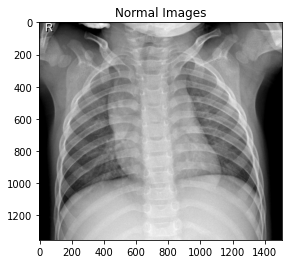

In [10]:
plt.figure(figsize=(12,12))
np.random.seed(1)
idx = [435,437,438,439,449,450,441,440,442]#np.random.randint(1,9,3) #IM-0476-0001.jpeg

for n in range(len(idx)):
  plt.title("Normal Images")
  img = image.load_img(f'/content/gdrive/MyDrive/Colab Notebooks/Internship/Kaggle/chest_xray/train/NORMAL/IM-0{idx[n]}-0001.jpeg')
  plt.imshow(img)
  plt.show()


In [11]:
img = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/Internship/Kaggle/chest_xray/train/NORMAL/IM-0440-0001.jpeg")

In [12]:
img.shape

(1464, 1690, 3)

In [13]:
img

array([[[ 0,  0,  0],
        [78, 78, 78],
        [82, 82, 82],
        ...,
        [ 2,  2,  2],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[ 0,  0,  0],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[ 0,  0,  0],
        [77, 77, 77],
        [74, 74, 74],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       ...,

       [[ 0,  0,  0],
        [ 3,  3,  3],
        [ 1,  1,  1],
        ...,
        [ 3,  3,  3],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[ 0,  0,  0],
        [ 3,  3,  3],
        [ 1,  1,  1],
        ...,
        [ 2,  2,  2],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[ 0,  0,  0],
        [ 3,  3,  3],
        [ 1,  1,  1],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 3,  3,  3]]], dtype=uint8)

## Data Augmentation

In [14]:
# normalization , basically image pixel values are 0 to 255
train = ImageDataGenerator(rescale=1./255,
                           rotation_range=90,
                           zoom_range=0.2,
                           width_shift_range=0.2,
                           height_shift_range = 0.2,
                           horizontal_flip = True
                           ) # for traing data
validation = ImageDataGenerator(rescale=1./255,
                                rotation_range=90,
                           zoom_range=0.2,
                           width_shift_range=0.2,
                           height_shift_range = 0.2,
                           horizontal_flip = True) # for validation data
test = ImageDataGenerator(rescale=1./255)

In [15]:
# for generating classes for traing data
train_data = train.flow_from_directory("/content/gdrive/MyDrive/Colab Notebooks/Internship/Kaggle/chest_xray/train",
                                       target_size=(240,240),# resize image
                                       batch_size=128,# while traing NN
                                       class_mode='categorical')# for generating classes

# for va;idation dataset
val_data = validation.flow_from_directory("/content/gdrive/MyDrive/Colab Notebooks/Internship/Kaggle/chest_xray/test",
                                          target_size=(240,240),
                                          batch_size=128,
                                          class_mode="categorical")
test_data = test.flow_from_directory("/content/gdrive/MyDrive/Colab Notebooks/Internship/Kaggle/chest_xray/val",
                                          target_size=(240,240),
                                          batch_size=128,
                                          class_mode="categorical")

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [16]:
train_data.class_indices # class label

{'NORMAL': 0, 'PNEUMONIA': 1}

In [19]:
train_data.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [27]:
train_data.

128

In [17]:
type(train_data)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

## DataFrame Creation 

## Train Test Split 

## Model Building

### CNN model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [21]:
model = None
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(240, 240, 3)))
# conv3
model.add(Conv2D(64, kernel_size=(3, 3), 
                 padding='same', 
                 activation='relu', 
                 ))
model.add(MaxPooling2D(pool_size=(2, 2)))
# conv3-128
model.add(Conv2D(128, (3, 3),
                 activation='relu',
                 ))
# Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flatten
model.add(Flatten())
# FC-1
model.add(Dense(2, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 238, 238, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 117, 117, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 58, 58, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 430592)            0

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
lr_reduce = ReduceLROnPlateau(
    monitor='val_loss', factor=0.3, patience=5, verbose=2,
    mode='auto')

history = model.fit(train_data,epochs=5,validation_data=val_data,callbacks=[lr_reduce])

Epoch 1/5
163/163 [==============================] - 1414s 9s/step - loss: 0.5781 - accuracy: 0.7720 - val_loss: 0.6396 - val_accuracy: 0.7115
Epoch 2/5
163/163 [==============================] - 129s 794ms/step - loss: 0.3865 - accuracy: 0.8154 - val_loss: 0.5663 - val_accuracy: 0.6971
Epoch 3/5
163/163 [==============================] - 129s 792ms/step - loss: 0.3508 - accuracy: 0.8372 - val_loss: 0.5426 - val_accuracy: 0.7644
Epoch 4/5
163/163 [==============================] - 129s 793ms/step - loss: 0.3575 - accuracy: 0.8353 - val_loss: 0.4591 - val_accuracy: 0.7949
Epoch 5/5
163/163 [==============================] - 130s 795ms/step - loss: 0.3346 - accuracy: 0.8533 - val_loss: 0.4822 - val_accuracy: 0.7885


In [26]:
model.evaluate(test_data)

1/1 [==============================] - 0s 222ms/step - loss: 0.4429 - accuracy: 0.8125


[0.44293731451034546, 0.8125]

In [ ]:
#/content/gdrive/MyDrive/Colab Notebooks/Internship/Kaggle/chest_xray/train

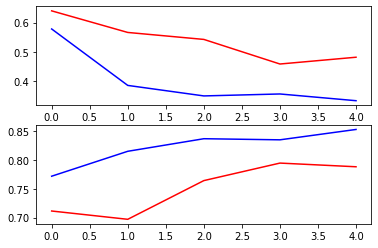

In [29]:
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assign the first subplot to graph training loss and validation loss
ax[0].plot(history.history['loss'],color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

#Next lets plot the training accuracy and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

## VGG16

In [26]:
from keras.applications.vgg16 import VGG16
from glob import glob
from keras.models import Model

In [27]:
vgg16 = VGG16(include_top=False,weights='imagenet',
              input_shape=(240,240,3))

58892288/58889256 [==============================] - 0s 0us/step


In [28]:
for layer in vgg16.layers:
  layer.trainable = False

In [29]:
#the glob module is used to retrieve files/pathnames matching a specified pattern.
folders = glob("/content/gdrive/MyDrive/Colab Notebooks/Internship/Kaggle/chest_xray/train/*")
# here glob retrive subfolders from train

In [30]:
x = Flatten()(vgg16.output)

In [31]:
predictions = Dense(len(folders),activation='softmax')(x)

In [32]:
model = Model(inputs=vgg16.input,outputs=predictions)

In [33]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 240, 240, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 240, 240, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 240, 240, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 120, 120, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 120, 120, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 120, 120, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 60, 60, 128)       0     

In [34]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [36]:
history = model.fit(train_data,validation_data=val_data,epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_steps=len(val_data))

Epoch 1/5
41/41 [==============================] - 1288s 31s/step - loss: 0.3580 - accuracy: 0.8382 - val_loss: 0.4117 - val_accuracy: 0.8253
Epoch 2/5
41/41 [==============================] - 128s 3s/step - loss: 0.2373 - accuracy: 0.9041 - val_loss: 0.3264 - val_accuracy: 0.8558
Epoch 3/5
41/41 [==============================] - 127s 3s/step - loss: 0.1975 - accuracy: 0.9241 - val_loss: 0.3446 - val_accuracy: 0.8590
Epoch 4/5
41/41 [==============================] - 127s 3s/step - loss: 0.1843 - accuracy: 0.9306 - val_loss: 0.3376 - val_accuracy: 0.8606
Epoch 5/5
41/41 [==============================] - 127s 3s/step - loss: 0.1718 - accuracy: 0.9346 - val_loss: 0.3977 - val_accuracy: 0.8205


In [37]:
model.evaluate(test_data)

1/1 [==============================] - 4s 4s/step - loss: 0.2191 - accuracy: 0.8125


[0.21908161044120789, 0.8125]

In [38]:
pred = model.predict(test_data)

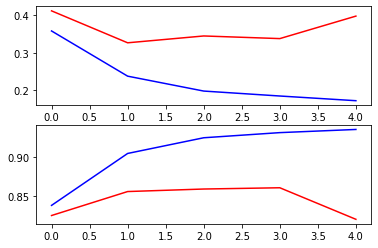

In [39]:
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assign the first subplot to graph training loss and validation loss
ax[0].plot(history.history['loss'],color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

#Next lets plot the training accuracy and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

In [40]:
from tensorflow.math import confusion_matrix

In [ ]:
cm = confusion_matrix(test_data,pred)

In [ ]:
sns.heatmap(cm)

## Resnet 50

In [ ]:
# Create model
model = None
model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(len(folders), activation='softmax'))

# Do not train first layer (ResNet) as it is already pre-trained
model.layers[0].trainable = False

# Compile model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])